In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/newvehicles.csv')

data2 = pd.read_csv('/content/fec.csv')

data3 = pd.read_csv('/content/import-oil.csv')

In [150]:
# Main dataframe
cars = (data.rename(columns={
    'ปี':'Year',
    'เดือน':'Month',
    'ประเภทรถ':'Type',
    'รหัสจังหวัด':'No.Province',
    'จังหวัด':'Province',
    'ยี่ห้อรถ':'Brand',
    'ชนิดเชื้อเพลิง':'Fuel Type',
    'จำนวนรถ':'Total',
  })
  .drop(columns=['No.Province'])
).copy()

# --- แปลง Year ---
cars['Year'] = pd.to_numeric(cars['Year'], errors='coerce')
cars.loc[cars['Year'] > 2500, 'Year'] = cars['Year'] - 543

# --- แปลง Total ---
cars['Total'] = (
    cars['Total']
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
    .astype(int)
)

# data.shape
# data.sample(10)
# print( f"{data .index=}\n" )
# print( f"{data .columns=}" )
# data.describe()
# data.describe(include=object)

display(cars)
cars.info()

,Year,Month,Type,Province,Brand,Fuel Type,Total
0,2020,มกราคม,รย. 1 รถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน,กรุงเทพมหานคร,ASTON MARTIN,เบนซิน,1
1,2020,มกราคม,รย. 1 รถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน,กรุงเทพมหานคร,AUDI,เบนซิน,81
2,2020,มกราคม,รย. 1 รถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน,กรุงเทพมหานคร,AUDI,ดีเซล,9
3,2020,มกราคม,รย. 1 รถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน,กรุงเทพมหานคร,BENTLEY,เบนซิน,3
4,2020,มกราคม,รย. 1 รถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน,กรุงเทพมหานคร,BENTLEY,เบนซิน-ไฟฟ้า,2
...,...,...,...,...,...,...,...
228149,2025,สิงหาคม,รย. 17 รถจักรยานยนต์สาธารณะ,นครปฐม,HONDA,เบนซิน,1
228150,2025,สิงหาคม,รย. 17 รถจักรยานยนต์สาธารณะ,ราชบุรี,HONDA,เบนซิน,1
228151,2025,สิงหาคม,รย. 17 รถจักรยานยนต์สาธารณะ,สมุทรสาคร,HONDA,เบนซิน,1
228152,2025,สิงหาคม,รย. 17 รถจักรยานยนต์สาธารณะ,เพชรบุรี,YAMAHA,เบนซิน,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228154 entries, 0 to 228153
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Year       228154 non-null  int64 
 1   Month      228154 non-null  object
 2   Type       228154 non-null  object
 3   Province   228154 non-null  object
 4   Brand      228154 non-null  object
 5   Fuel Type  228154 non-null  object
 6   Total      228154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.2+ MB


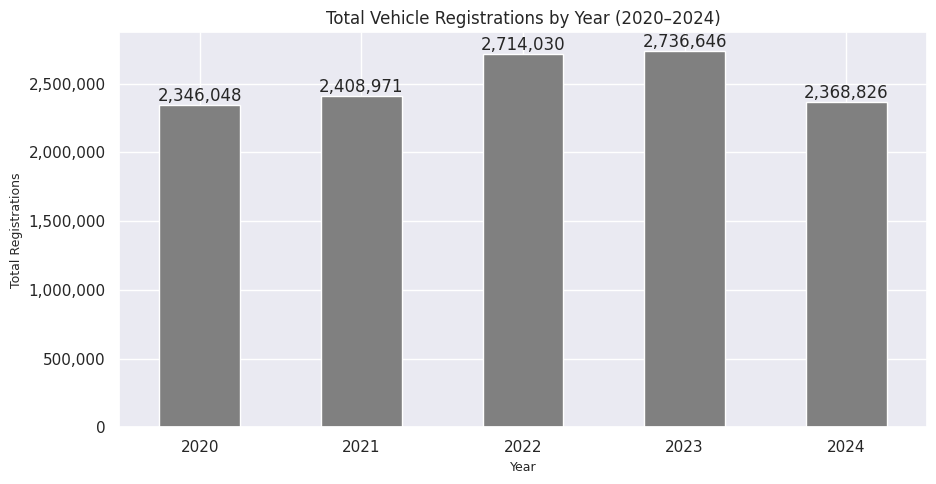

In [151]:
#All cars 2020-2024
#Total Vehicle Registrations by Year (2020–2024)

all = cars.query("Year >= 2020 and Year <= 2024")[
    ['Year','Month','Type','Province','Brand','Fuel Type','Total']
]

group_all = all.groupby('Year')['Total'].sum()

# display(group_all)

sns.set_theme(style="darkgrid")
plt.figure(figsize=(9,5))
group_all.plot(kind='bar', color='gray')

plt.title("Total Vehicle Registrations by Year (2020–2024)", fontsize=12)
plt.xlabel("Year", fontsize=9)
plt.ylabel("Total Registrations", fontsize=9)
plt.xticks(rotation=0)
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# ใส่ตัวเลขบนแท่ง
for i, v in enumerate(group_all.values):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

plt.savefig("Figure 1.1.png", dpi=300, bbox_inches="tight")
plt.show()


In [152]:
#All type table

all_types = (
    cars.loc[cars['Year'].between(2020, 2024)]
    .groupby(['Type','Year'])['Total']
    .sum()
    .unstack(fill_value=0)
)

all_types = all_types.sort_values(by=2024, ascending=False)

all_types.reset_index(inplace=True)

display(all_types)


Year,Type,2020,2021,2022,2023,2024
0,รย. 12 รถจักรยานยนต์,1517682,1610223,1801902,1878655,1708215
1,รย. 1 รถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน,541144,515957,610130,630881,486963
2,รย. 3 รถยนต์บรรทุกส่วนบุคคล,209745,207368,215263,150222,98427
3,รย. 13 รถแทรกเตอร์,53451,60839,65982,56128,53862
4,รย. 2 รถยนต์นั่งส่วนบุคคลเกิน 7 คน,16418,11048,16516,14575,14791
5,รย. 6 รถยนต์รับจ้างบรรทุกคนโดยสารไม่เกิน 7 คน,3167,361,691,1804,3245
6,รย. 17 รถจักรยานยนต์สาธารณะ,2160,1153,1093,1183,942
7,รย. 16 รถพ่วง,1034,972,1106,1024,876
8,รย. 10 รถยนต์บริการทัศนาจร,163,10,219,721,592
9,รย. 14 รถบดถนน,829,947,760,619,510


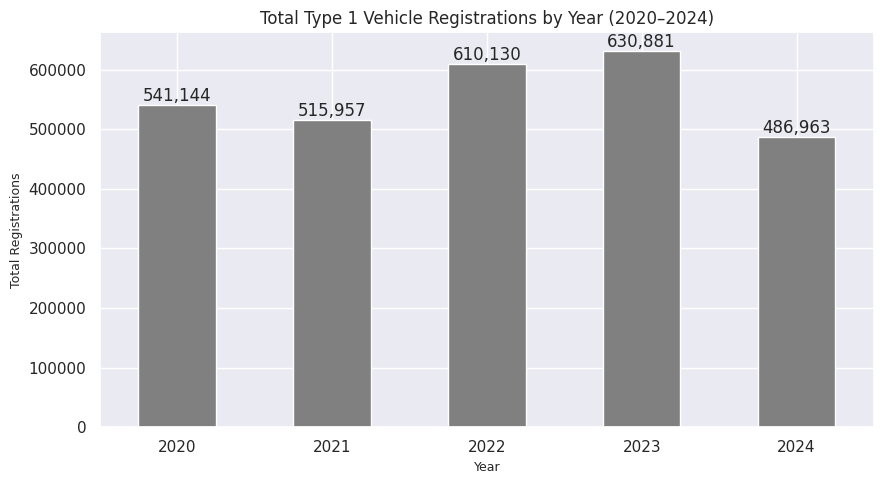

In [153]:
#type 1
type_one = cars.query("Year >= 2020 and Year <= 2024 and `Type` == 'รย. 1 รถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน'")[
    ['Year','Month','Type','Province','Brand','Fuel Type','Total']
]

group_type_one = type_one.groupby('Year')['Total'].sum()

# display(group_type_one)

sns.set_theme(style="darkgrid")
plt.figure(figsize=(9,5))
group_type_one.plot(kind='bar', color='gray')

plt.title("Total Type 1 Vehicle Registrations by Year (2020–2024)", fontsize=12)
plt.xlabel("Year", fontsize=9)
plt.ylabel("Total Registrations", fontsize=9)
plt.xticks(rotation=0)

# ใส่ตัวเลขบนแท่ง
for i, v in enumerate(group_type_one.values):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')

plt.tight_layout()

plt.savefig("Figure 1.3.png", dpi=300, bbox_inches="tight")
plt.show()

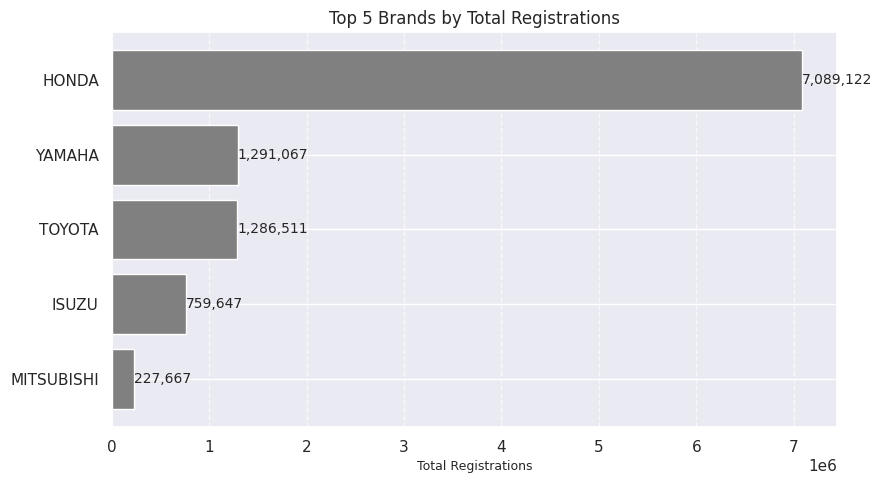

In [154]:
#top 5 type 1
group_top5_all = all.groupby('Brand')['Total'].sum().sort_values(ascending=False).head(5)

# display(group_top5_all)

top5_sorted = group_top5_all.sort_values(ascending=True)  # ascending=True + barh จะกลับลำดับ

plt.figure(figsize=(9,5))
plt.barh(top5_sorted.index, top5_sorted.values, color="gray")
plt.title("Top 5 Brands by Total Registrations", fontsize=12)
plt.xlabel("Total Registrations", fontsize=9)
plt.grid(True, axis="x", linestyle="--", alpha=0.7)


# ใส่ตัวเลขบนแท่ง
for i, v in enumerate(top5_sorted.values):
    plt.text(v, i, f"{v:,}", va="center", ha="left", fontsize=10)

plt.tight_layout()
plt.savefig("Figure 1.4.png", dpi=300, bbox_inches="tight")
plt.show()

In [155]:
#Query
years = range(2020, 2025)
type1_cars = (cars.loc[(cars['Type'] == 'รย. 1 รถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน') & (cars['Year'].between(2020, 2024))])

# display(type1_cars)

total_ev = (type1_cars.loc[(type1_cars['Fuel Type'] == 'ไฟฟ้า') & (type1_cars[
    'Year'].between(2020, 2024))].groupby('Year')['Total'].sum().reindex(years, fill_value=0))

# display(total_ev)

total_non_ev = (type1_cars.loc[(type1_cars['Fuel Type'] != 'ไฟฟ้า') & (type1_cars[
    'Year'].between(2020, 2024))].groupby('Year')['Total'].sum().reindex(years, fill_value=0))

# display(total_non_ev)

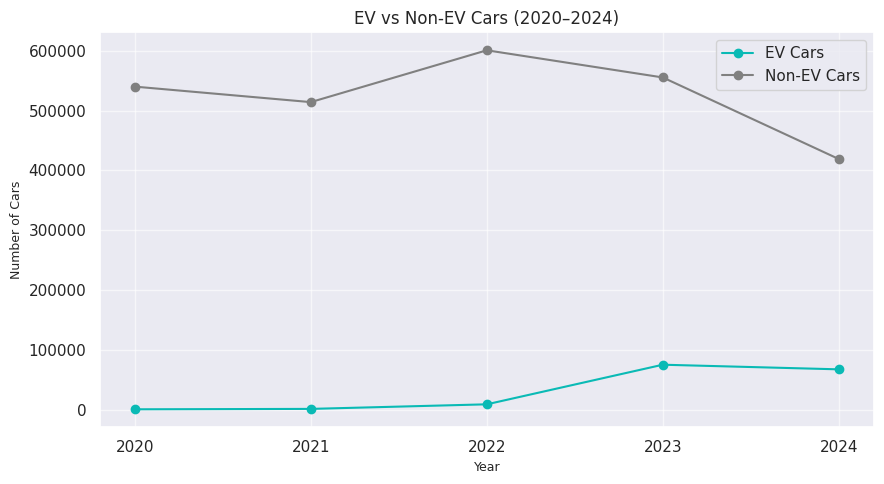

In [156]:
# line graph
#กราฟยอดจด non ev vs ev
sns.set_theme(style="darkgrid")
plt.figure(figsize=(9,5))

total_ev.index = total_ev.index.year if hasattr(total_ev.index, 'year') else total_ev.index.astype(int)
total_non_ev.index = total_non_ev.index.year if hasattr(total_non_ev.index, 'year') else total_non_ev.index.astype(int)


plt.plot(total_ev.index, total_ev.values, marker='o', label='EV Cars', color='#0ABAB5')

plt.plot(total_non_ev.index, total_non_ev.values, marker='o', label='Non-EV Cars', color='gray')

plt.title('EV vs Non-EV Cars (2020–2024)', fontsize=12)
plt.xlabel('Year', fontsize=9)
plt.ylabel('Number of Cars', fontsize=9)


plt.grid(True, linestyle='-', alpha=0.6)
plt.legend()
plt.xticks(total_ev.index)
plt.tight_layout()

plt.savefig("Figure 2.1.png", dpi=300, bbox_inches="tight")
plt.show()

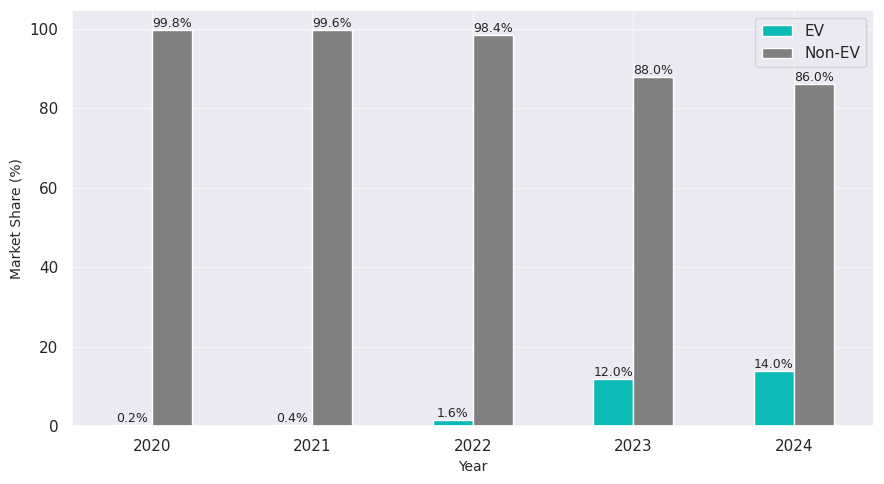

In [157]:
ev1 = cars.query("`Type` == 'รย. 1 รถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน' and `Fuel Type` == 'ไฟฟ้า' and `Year` >= 2020 and `Year` <= 2024")
non_ev = cars.query("`Type` == 'รย. 1 รถยนต์นั่งส่วนบุคคลไม่เกิน 7 คน' and `Fuel Type` != 'ไฟฟ้า' and `Year` >= 2020 and `Year` <= 2024")

group = ev1[['Year','Type','Province','Fuel Type','Province','Brand','Fuel Type','Total']].groupby('Year')['Total'].sum()
group_non_ev = non_ev[['Year','Type','Province','Fuel Type','Province','Brand','Fuel Type','Total']].groupby('Year')['Total'].sum()

# display(group)
# display(group_non_ev)

df_compare = pd.DataFrame({'EV': group, 'Non-EV': group_non_ev}).fillna(0)

market_share = df_compare.div(df_compare.sum(axis=1), axis=0) * 100

sns.set_theme(style="darkgrid")
ax = market_share.plot(kind='bar', figsize=(9,5),color=["#0ABAB5", "gray"])
ax.grid(True, linestyle='-', alpha=0.6)

plt.xlabel("Year", fontsize=10)
plt.ylabel("Market Share (%)", fontsize=10)
plt.xticks(rotation=0)


# ใส่ค่าบนแท่ง
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="edge", fontsize=9)

plt.tight_layout()
plt.savefig("Figure 3.1.png", dpi=300, bbox_inches="tight")
plt.show()

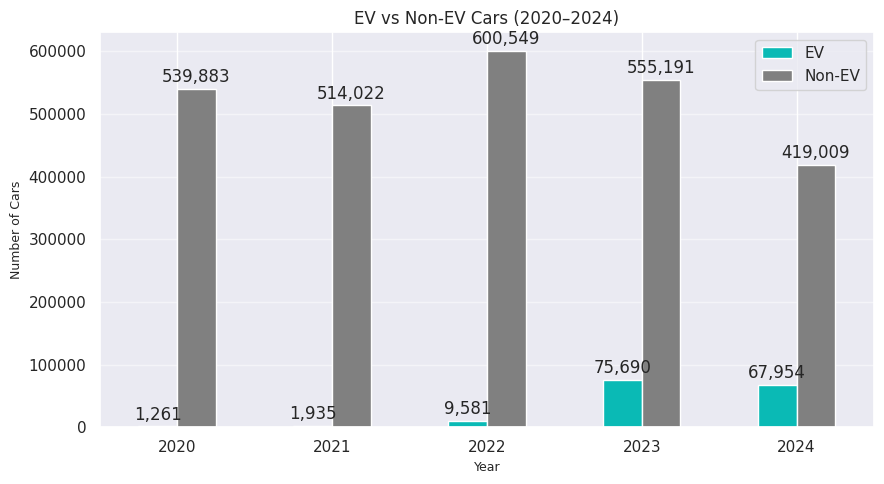

In [158]:
#Market share

group.index = group.index.astype(int)
group_non_ev.index = group_non_ev.index.astype(int)

years = range(2020, 2025)
df_year = pd.DataFrame({
    "EV": group,
    "Non-EV": group_non_ev
}).reindex(years).fillna(0).astype(int)

sns.set_theme(style="darkgrid")
ax = df_year.plot(kind="bar", figsize=(9,5),color=["#0ABAB5", "gray"])

plt.title("EV vs Non-EV Cars (2020–2024)", fontsize=12)
plt.xlabel("Year", fontsize=9)
plt.ylabel("Number of Cars", fontsize=9)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="-", alpha=0.5)
plt.legend(title="")


# ใส่ตัวเลขบนแท่ง
for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", padding=2)

plt.tight_layout()
plt.savefig("Figure 2.2.png", dpi=300, bbox_inches="tight")
plt.show()

EV Growth 2022 → 2023 : 690.00%


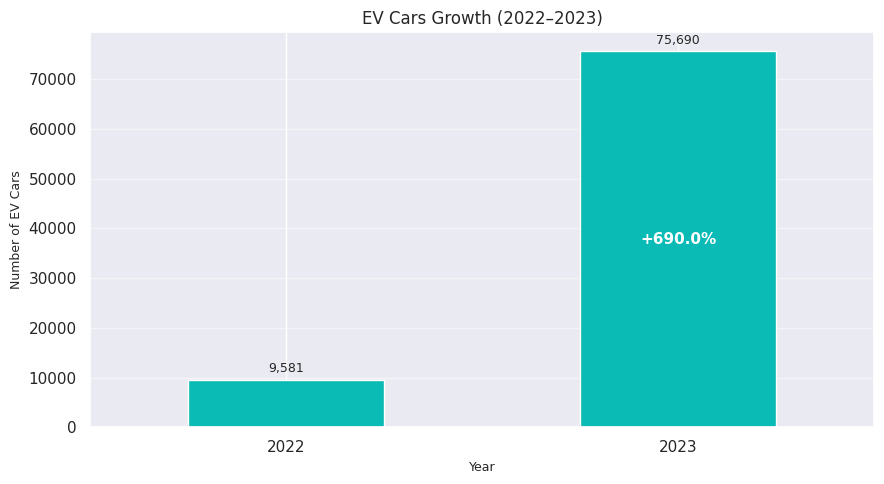

In [159]:
# ev growth 2022-2023
ev_2022 = df_year.query("index == 2022")["EV"].values[0]
ev_2023 = df_year.query("index == 2023")["EV"].values[0]

growth_ev = ((ev_2023 - ev_2022) / ev_2022) * 100
print(f"EV Growth 2022 → 2023 : {growth_ev:.2f}%")

df_ev_22_23 = df_year.query("index >= 2022 and index <= 2023")[["EV"]]

sns.set_theme(style="darkgrid")
ax = df_ev_22_23.plot(kind="bar", figsize=(9,5), color="#0ABAB5", legend=False)

plt.title("EV Cars Growth (2022–2023)", fontsize=12)
plt.xlabel("Year", fontsize=9)
plt.ylabel("Number of EV Cars", fontsize=9)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="-", alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt="{:,.0f}", padding=3, fontsize=9)

bar_2023_height = ev_2023 / 2
plt.text(
    1,
    bar_2023_height,
    f"+{growth_ev:.1f}%",
    ha="center", va="center",
    color="white", fontsize=11, fontweight="bold"
)

plt.tight_layout()
plt.savefig("Figure 2.2.1.png", dpi=300, bbox_inches="tight")
plt.show()


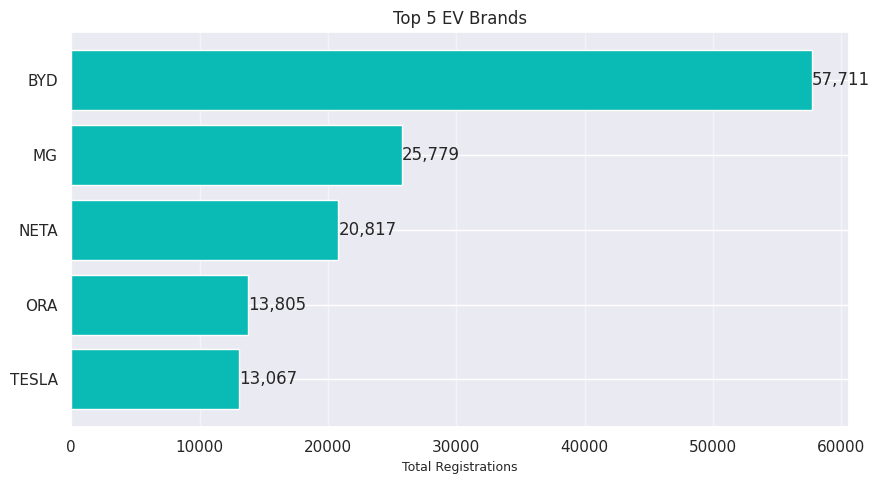

In [160]:
#Top 5 Ev
top5 = ev1.groupby('Brand')['Total'].sum().sort_values(ascending=False).head(5)
top5_non_ev = non_ev.groupby('Brand')['Total'].sum().sort_values(ascending=False).head(5)

# display(top5)
# display(top5_non_ev)

top5_ev_sorted = top5.sort_values(ascending=True)
top5_non_ev_sorted = top5_non_ev.sort_values(ascending=True)

# -------- EV --------
sns.set_theme(style="darkgrid")
plt.figure(figsize=(9,5))
plt.barh(top5_ev_sorted.index, top5_ev_sorted.values, color="#0ABAB5",)
plt.grid(True, axis="x", linestyle="-", alpha=0.5)
plt.title("Top 5 EV Brands", fontsize=12)
plt.xlabel("Total Registrations", fontsize=9)
plt.savefig("Figure 2.4.png", dpi=300, bbox_inches="tight")

# ใส่ตัวเลขบนแท่ง
for i, v in enumerate(top5_ev_sorted.values):
    plt.text(v, i, f"{v:,}", va="center", ha="left")

plt.tight_layout()
plt.savefig("Figure 3.2.png", dpi=300, bbox_inches="tight")
plt.show()

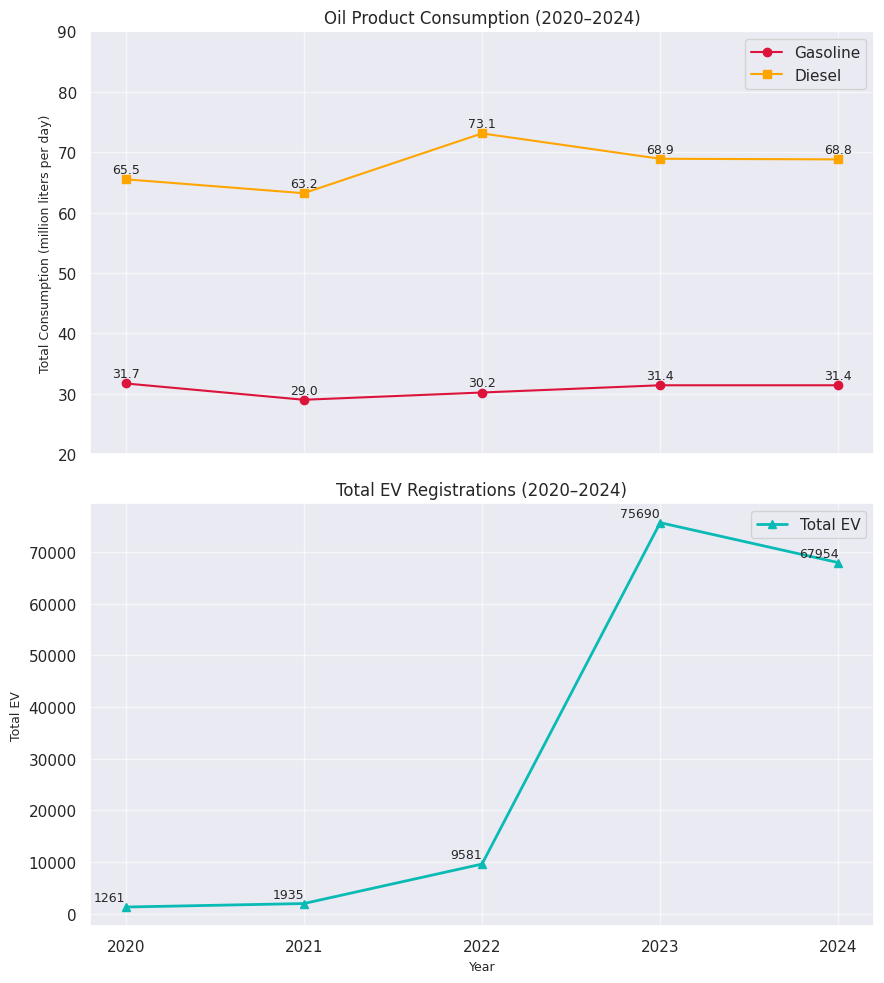

In [161]:
# Gasoline & Diesel line graph
df = (pd.merge(data2, total_ev, on='Year').rename(columns={'Total': 'Total EV'}))

df['Year'] = df['Year'].astype(int)

sns.set_theme(style='darkgrid')
fig, axes = plt.subplots(2, 1, figsize=(9,10), sharex=True)

axes[0].plot(df['Year'], df['Gasoline'], marker='o', color='#DC143C', label='Gasoline')
axes[0].plot(df['Year'], df['Diesel'], marker='s', color='orange', label='Diesel')
axes[0].set_ylabel('Total Consumption (million liters per day)', fontsize=9)
axes[0].set_ylim(20, 90)
axes[1].set_xticks(df['Year'])
axes[0].set_title('Oil Product Consumption (2020–2024)', fontsize=12)
axes[0].legend()
axes[0].grid(True, linestyle='-', alpha=0.6)

for x, y in zip(df['Year'], df['Gasoline']):
    axes[0].text(x, y + 0.5, f'{y}', ha='center', va='bottom', fontsize=9)

for x, y in zip(df['Year'], df['Diesel']):
    axes[0].text(x, y + 0.5, f'{y}', ha='center', va='bottom', fontsize=9)

# Total EV
axes[1].plot(df['Year'], df['Total EV'], marker='^', color='#0ABAB5', label='Total EV', linewidth=2)
axes[1].set_xlabel('Year', fontsize=9)
axes[1].set_ylabel('Total EV', fontsize=9)
axes[1].set_xticks(df['Year'])
axes[1].set_title('Total EV Registrations (2020–2024)', fontsize=12)
axes[1].legend()
axes[1].grid(True, linestyle='-', alpha=0.6)

for x, y in zip(df['Year'], df['Total EV']):
    axes[1].text(x, y + 500, f'{y}', ha='right', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("Figure 3.3.png", dpi=300, bbox_inches="tight")
plt.show()

      Total EV  Gasoline  Diesel
Year                            
2020      1261      31.7    65.5
2021      1935      29.0    63.2
2022      9581      30.2    73.1
2023     75690      31.4    68.9
2024     67954      31.4    68.8

Correlation:
           Total EV  Gasoline    Diesel
Total EV  1.000000  0.519312  0.311147
Gasoline  0.519312  1.000000  0.253745
Diesel    0.311147  0.253745  1.000000


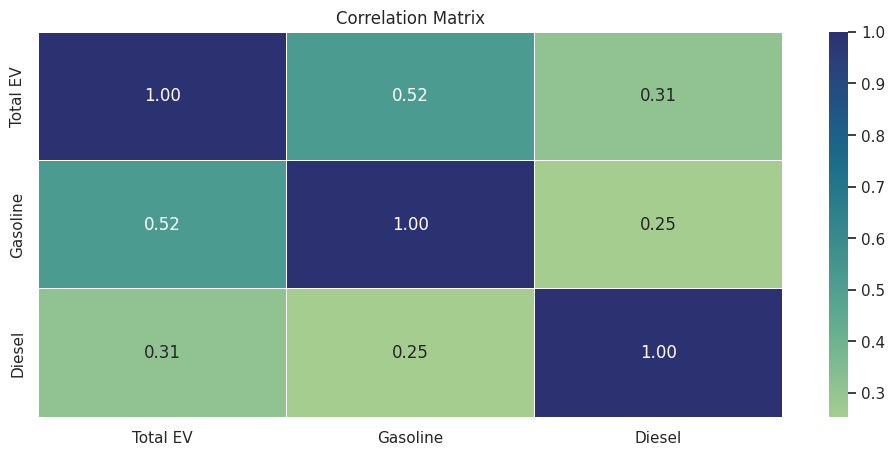

In [162]:
# Correlation between Total EV - Gasoline - Diesel

gas_df = data2.set_index('Year')
ev_df  = total_ev.rename('Total EV').to_frame()

df = ev_df.join(gas_df, how='inner')

df_corr = df.corr(method='pearson')

print(df)
print("\nCorrelation:\n", df.corr())

plt.figure(figsize=(12,5))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='crest', linewidths=.5)
plt.title('Correlation Matrix', fontsize=12)
plt.savefig("Figure 3.4.png", dpi=300, bbox_inches="tight")
plt.show()

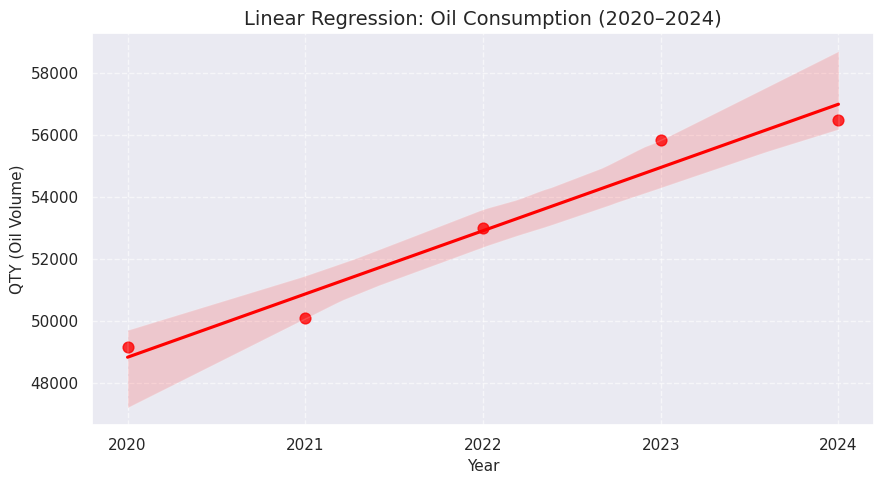

In [163]:
# ---------- Dataset 1: group_oil ----------
df_oil = group_oil.reset_index()
df_oil.columns = ["Year", "QTY"]
df_oil["Year"] = df_oil["Year"].apply(lambda x: int(float(x)))
df_oil = df_oil.sort_values("Year")

# ---------- Dataset 2: group (EV) ----------
df_ev = group.reset_index()
df_ev.columns = ["Year", "Total"]
df_ev["Year"] = df_ev["Year"].apply(lambda x: int(float(x)))
df_ev = df_ev.sort_values("Year")
df_ev["Total"] = df_ev["Total"].clip(lower=0)

sns.set_theme(style="darkgrid")

plt.figure(figsize=(9,5))
sns.regplot(
    data=df_oil, x="Year", y="QTY",
    scatter_kws={"color": "red", "s": 60},
    line_kws={"color": "red"},
    ci=95
)
plt.title("Linear Regression: Oil Consumption (2020–2024)", fontsize=14)
plt.xlabel("Year", fontsize=11)
plt.ylabel("QTY (Oil Volume)", fontsize=11)
plt.xticks(sorted(df_oil["Year"].unique()))
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

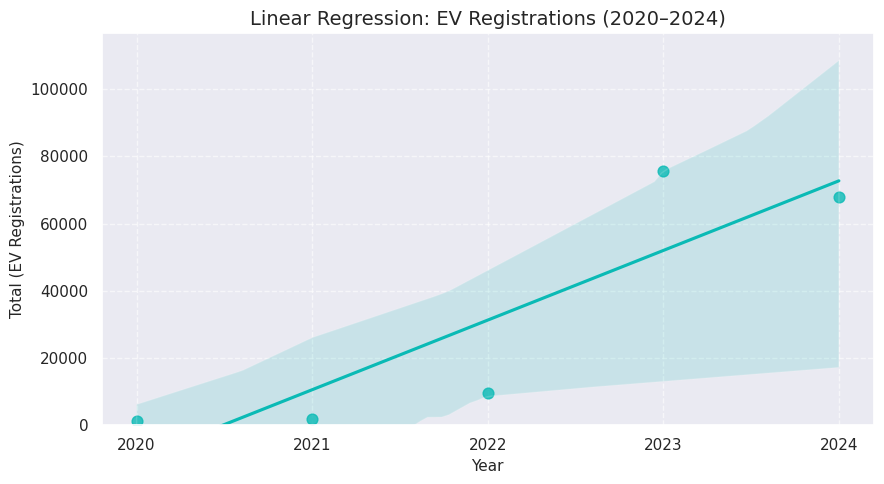

In [164]:
#EV
plt.figure(figsize=(9,5))
sns.regplot(
    data=df_ev, x="Year", y="Total",
    scatter_kws={"color": "#0ABAB5", "s": 60},
    line_kws={"color": "#0ABAB5"},
    ci=95
)
plt.title("Linear Regression: EV Registrations (2020–2024)", fontsize=14)
plt.xlabel("Year", fontsize=11)
plt.ylabel("Total (EV Registrations)", fontsize=11)
plt.xticks(sorted(df_ev["Year"].unique()))
plt.ylim(bottom=0)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()